In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.float_format', lambda x: '%.f' % x)

In [2]:
import time

In [3]:
path = "safety/features"
files = os.listdir(path)

In [4]:
df = pd.DataFrame()

In [5]:
for f in files:
    data = pd.read_csv(path+'//'+f)
    df = df.append(data)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
df.head()

,Accuracy,Bearing,Speed,Unnamed: 0,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second
0,8.000,253.815094,22.800875,NaN,-0.018842,-9.778915,0.141910,6.786048e+11,0.000004,0.127894,-0.003946,849.0
1,6.000,46.780491,8.029377,NaN,3.053528,-11.339175,1.049893,1.975685e+11,-0.228431,0.100745,-0.009538,656.0
2,3.000,301.000000,0.000000,NaN,0.567177,9.913507,0.318716,1.709397e+12,-0.022131,0.011083,0.002845,369.0
3,3.482,297.000000,3.599888,NaN,3.598595,10.094262,-1.747821,9.191230e+11,0.002806,0.166651,0.088069,1468.0
4,3.210,0.000000,0.000000,NaN,0.466644,8.914932,3.394867,1.039382e+12,0.002533,0.005173,0.002060,276.0


In [7]:
df['Unnamed: 0'].unique()

array([nan], dtype=object)

In [8]:
del df['Unnamed: 0']

In [9]:
labels = pd.read_csv("safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")

In [10]:
data = pd.merge(df, labels, how='inner', on='bookingID')

In [11]:
df.count()

Accuracy          16135561
Bearing           16135561
Speed             16135561
acceleration_x    16135561
acceleration_y    16135561
acceleration_z    16135561
bookingID         16135561
gyro_x            16135561
gyro_y            16135561
gyro_z            16135561
second            16135561
dtype: int64

In [12]:
del df
gc.collect()

18

In [13]:
data['bookingID'] = data.bookingID.astype(str)

In [14]:
data.head()

,Accuracy,Bearing,Speed,acceleration_x,acceleration_y,acceleration_z,bookingID,gyro_x,gyro_y,gyro_z,second,label
0,8.0,253.815094,22.800875,-0.018842,-9.778915,0.141910,678604832892.0,0.000004,0.127894,-0.003946,849.0,0
1,6.0,87.203369,3.983518,0.268567,-9.703848,-1.076660,678604832892.0,0.002257,0.005405,-0.008485,600.0,0
2,6.0,249.762634,23.714880,0.645996,-10.483231,-0.967947,678604832892.0,0.002164,0.023651,-0.003111,916.0,0
3,6.0,267.421600,20.843636,0.004935,-12.841415,-2.063150,678604832892.0,-0.015882,-0.070103,0.065709,997.0,0
4,8.0,272.301819,3.438376,0.213388,-9.690390,-0.765027,678604832892.0,-0.002547,0.129146,-0.044486,3.0,0


In [15]:
labels.label.sum()

5001

In [16]:
5001/20018

0.24982515735837746

In [17]:
labels.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [27]:
data[['bookingID', 'Speed', 'label']].groupby(['bookingID'], axis=0).agg({"Speed":"count", "label":"sum"}).reset_index()

,bookingID,Speed,label
0,0.0,1004,0
1,1.0,851,851
2,10.0,375,0
3,1005022347266.0,840,840
4,1005022347267.0,740,740
5,1005022347268.0,428,0
6,1005022347269.0,1595,0
7,1005022347271.0,420,0
8,1005022347275.0,630,0
9,1005022347277.0,1050,0


In [64]:
sample_0 = data.loc[data['bookingID'] == '1005022347305.0'].sort_values(by ='second') 
sample_1 = data.loc[data['bookingID'] == '1005022347266.0'].sort_values(by ='second')

In [63]:
#1013612281987.0 -> 0
#1013612282014.0 -> 1

In [29]:
sample_0.columns

Index(['Accuracy', 'Bearing', 'Speed', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'bookingID', 'gyro_x', 'gyro_y', 'gyro_z', 'second',
       'label'],
      dtype='object')

In [70]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


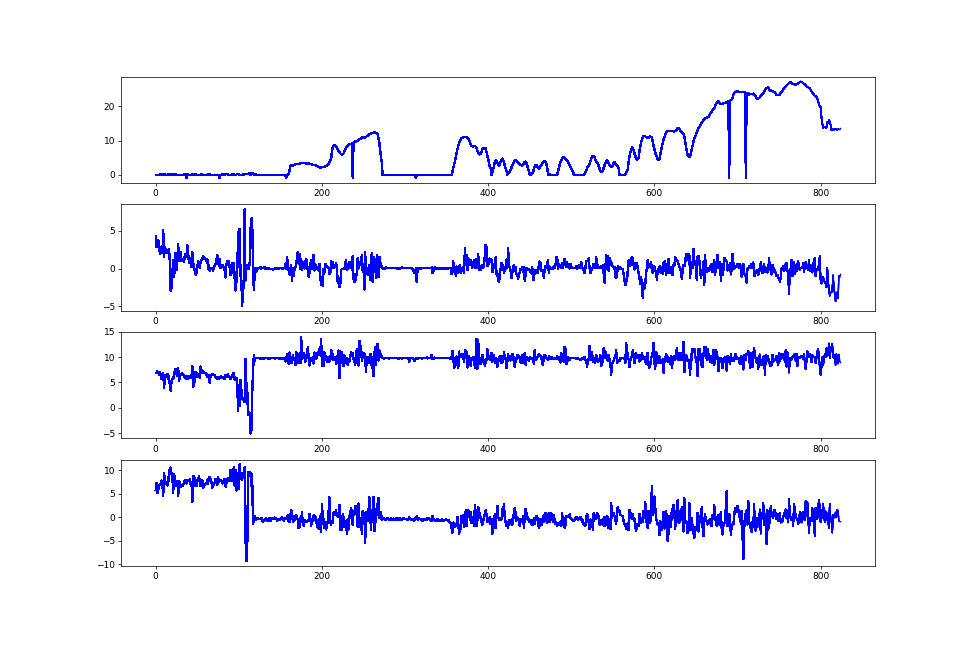

In [66]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)   
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
fig.show()

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10))
#fig.show()

In [67]:
x, y1, y2, y3, y4 = [], [], [], [], []

for i in sample_0[['second','Speed', 'acceleration_x', 'acceleration_y', 'acceleration_z']].values:
    x.append(i[0])
    y1.append(i[1].item())
    y2.append(i[2].item())
    y3.append(i[3].item())
    y4.append(i[4].item())
    ax1.plot(x, y1, color='b')
    ax2.plot(x, y2, color='b')
    ax3.plot(x, y3, color='b')
    ax4.plot(x, y4, color='b')
    fig.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)


<IPython.core.display.Javascript object>


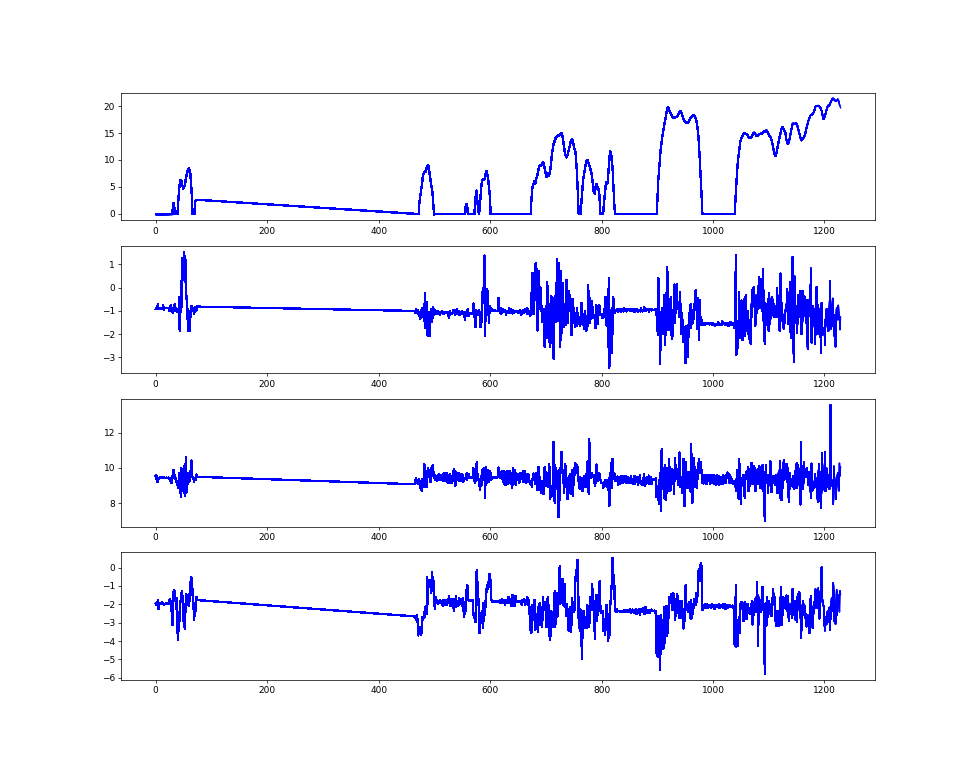

In [74]:
fig2 = plt.figure(figsize=(15,12))
ax01 = fig2.add_subplot(411)
ax02 = fig2.add_subplot(412)   
ax03 = fig2.add_subplot(413)
ax04 = fig2.add_subplot(414)
fig2.show()

In [75]:
x, y1, y2, y3, y4 = [], [], [], [], []

for i in sample_1[['second','Speed', 'acceleration_x', 'acceleration_y', 'acceleration_z']].values:
    x.append(i[0])
    y1.append(i[1].item())
    y2.append(i[2].item())
    y3.append(i[3].item())
    y4.append(i[4].item())
    ax01.plot(x, y1, color='b')
    ax02.plot(x, y2, color='b')
    ax03.plot(x, y3, color='b')
    ax04.plot(x, y4, color='b')
    fig2.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)

In [73]:
sample_1[['second','Speed', 'acceleration_x', 'acceleration_y', 'acceleration_z']]

,second,Speed,acceleration_x,acceleration_y,acceleration_z
14113007,0.0,0.000000,-0.906225,9.547540,-1.969930
14113353,1.0,0.000000,-0.910218,9.573196,-2.032428
14113264,2.0,0.000000,-0.851665,9.256682,-1.912153
14113053,3.0,0.000000,-0.797595,9.198331,-1.941841
14113257,4.0,0.000000,-0.729283,9.309480,-1.782339
14113261,5.0,0.000000,-0.932771,9.407336,-2.270680
14113590,6.0,0.000000,-0.903447,9.417439,-1.988997
14112993,7.0,0.000000,-0.883776,9.456838,-1.982897
14112918,8.0,0.000000,-0.891725,9.445873,-1.963964
14113126,9.0,0.000000,-0.909509,9.441267,-1.928520


<IPython.core.display.Javascript object>


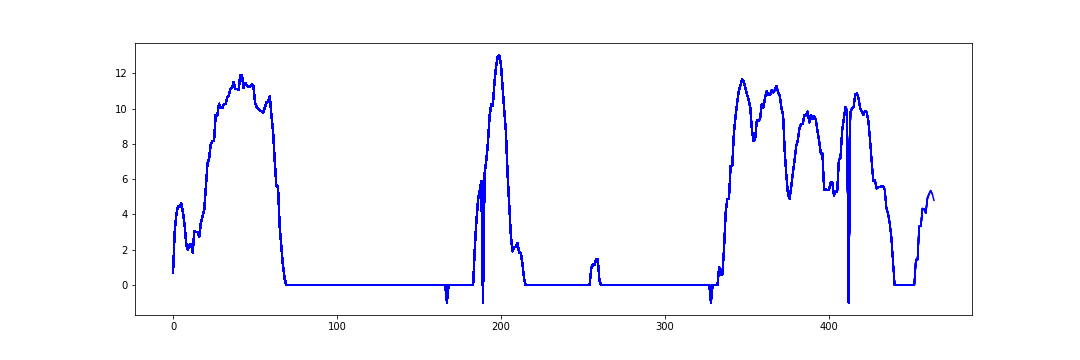

In [113]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111)
fig1.show()

In [114]:
x, y = [], []

for i in sample_1[['second','Speed']].values:
    x.append(i[0])
    y.append(i[1].item())
    ax1.plot(x, y, color='b')
    fig1.canvas.draw()
    #ax.set_xlim(left=max(0, i[0]-50), right=i[0]+50)    
    time.sleep(0.01)

In [62]:
plt.close()

In [15]:
data.loc[data.label == 1].groupby(['bookingID'], axis=0).agg(
        {"acceleration_x":"mean",
         "acceleration_y":"mean",
         "acceleration_z":"mean",
         "gyro_x":"mean",
         "gyro_y":"mean",
         "gyro_z":"mean",
         "Speed":"mean"}).reset_index()

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
0,1.000000e+00,-0.525406,9.532086,-2.198999,-0.002467,-0.007540,0.000405,7.881588
1,2.000000e+00,0.306786,9.843183,0.139347,0.006458,-0.012861,0.002597,3.157213
2,4.000000e+00,-0.365117,-9.406439,-2.613639,-0.022884,0.023232,-0.000376,6.150996
3,1.300000e+01,0.993263,8.695737,4.421685,-0.002206,0.009890,0.005380,15.521918
4,1.800000e+01,0.104708,-9.790989,0.652146,-0.006360,-0.017947,-0.002716,4.738116
5,3.500000e+01,-0.147625,8.909631,-0.081252,-0.014138,0.031415,-0.001331,16.619441
6,4.100000e+01,0.099424,9.770956,-0.653866,-0.002039,-0.005340,0.001372,2.123185
7,4.700000e+01,0.929326,5.093129,8.235005,0.018512,-0.000249,0.044984,10.376869
8,5.200000e+01,0.924517,7.973439,5.659571,0.000796,-0.008567,-0.007151,4.904893
9,5.700000e+01,-0.201948,8.869689,3.775003,-0.006832,-0.002085,-0.003429,9.363595


In [28]:
data.loc[data.label == 0].groupby(['bookingID'], axis=0).agg(
        {"acceleration_x":"mean",
         "acceleration_y":"mean",
         "acceleration_z":"mean",
         "gyro_x":"mean",
         "gyro_y":"mean",
         "gyro_z":"mean",
         "Speed":"mean"}).reset_index()

,bookingID,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
0,0.000000e+00,-0.711264,-9.613822,-1.619658,0.003328,-0.006118,-0.004188,8.994822
1,6.000000e+00,0.490616,9.538043,2.355059,0.003877,0.000436,0.002930,4.628921
2,7.000000e+00,1.327679,9.386286,2.139714,-0.003932,0.003424,-0.005800,12.176386
3,8.000000e+00,-1.197008,9.473209,1.707760,0.004716,-0.000694,-0.001139,5.351266
4,1.000000e+01,0.954849,9.229290,-1.576419,-0.001418,0.002311,-0.001383,8.702027
5,1.100000e+01,0.564240,9.738133,0.615137,0.005530,-0.004115,0.003009,6.659024
6,1.300000e+01,0.993263,8.695737,4.421685,-0.002206,0.009890,0.005380,15.521918
7,1.400000e+01,-0.278186,-9.736583,1.205154,0.005947,-0.002755,-0.004238,4.725448
8,1.600000e+01,1.323372,9.760118,0.056907,0.007290,-0.004981,-0.003210,6.094209
9,1.700000e+01,2.860032,9.325441,-1.516561,0.000615,0.009454,0.001992,12.930346
